<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-Data" data-toc-modified-id="Importing-Libraries-and-Data-1">Importing Libraries and Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-2.1">Check for duplicates</a></span></li><li><span><a href="#Check-for-missing-values" data-toc-modified-id="Check-for-missing-values-2.2">Check for missing values</a></span></li><li><span><a href="#Check-datatype-consistency" data-toc-modified-id="Check-datatype-consistency-2.3">Check datatype consistency</a></span></li><li><span><a href="#Check-for-extreme-values" data-toc-modified-id="Check-for-extreme-values-2.4">Check for extreme values</a></span></li><li><span><a href="#Data-Prep-for-Regression-Analysis" data-toc-modified-id="Data-Prep-for-Regression-Analysis-2.5">Data Prep for Regression Analysis</a></span><ul class="toc-item"><li><span><a href="#State-your-hypothesis-for-the-relationship-between-the-variables" data-toc-modified-id="State-your-hypothesis-for-the-relationship-between-the-variables-2.5.1">State your hypothesis for the relationship between the variables</a></span></li></ul></li><li><span><a href="#Regression-Analysis" data-toc-modified-id="Regression-Analysis-2.6">Regression Analysis</a></span></li><li><span><a href="#Compare-how-the-regression-fits-the-training-set" data-toc-modified-id="Compare-how-the-regression-fits-the-training-set-2.7">Compare how the regression fits the training set</a></span><ul class="toc-item"><li><span><a href="#Discuss-how-well-the-model-performed." data-toc-modified-id="Discuss-how-well-the-model-performed.-2.7.1">Discuss how well the model performed.</a></span></li></ul></li></ul></li></ul></div>

# Importing Libraries and Data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
# display graphs within the notebook
%matplotlib inline

In [12]:
# define a path
path = r'/Users/profkdfischer/World Happiness Report Analysis'

In [13]:
# import the cleaned dataframe from Exercise 6.1 on the World Happiness report
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'whr_df.csv'))

In [14]:
# check the head
df.head()

,Unnamed: 0,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [15]:
# check the shape
df.shape

(1367, 11)

In [16]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1367 non-null   int64  
 1   country                       1367 non-null   object 
 2   region                        1367 non-null   object 
 3   happiness_score               1367 non-null   float64
 4   gdp_per_capita                1367 non-null   float64
 5   social_support                1367 non-null   float64
 6   healthy_life_expectancy       1367 non-null   float64
 7   freedom_to_make_life_choices  1367 non-null   float64
 8   generosity                    1367 non-null   float64
 9   perceptions_of_corruption     1367 non-null   float64
 10  year                          1367 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 117.6+ KB


In [17]:
# check the stats
df.describe()

,Unnamed: 0,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.00000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,683.00000,5.441086,1.019422,1.045334,0.584040,0.450771,0.196260,0.132378,2018.903438
std,394.76322,1.117909,0.453703,0.331163,0.245028,0.156733,0.113301,0.112579,2.561006
min,0.00000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,341.50000,4.599500,0.696326,0.832022,0.402554,0.356000,0.115000,0.056884,2017.000000
50%,683.00000,5.440000,1.043000,1.083000,0.612448,0.467610,0.182700,0.097000,2019.000000
75%,1024.50000,6.256300,1.338473,1.299985,0.777602,0.568685,0.252858,0.166500,2021.000000
max,1366.00000,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


# Data Cleaning

## Check for duplicates

In [18]:
# check for duplicates -- there are none
dups = df.duplicated()
dups.shape

(1367,)

## Check for missing values

In [19]:
# check for missing values -- there are none
df.isnull().sum()

Unnamed: 0                      0
country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

## Check datatype consistency

In [21]:
# check each column for mixed datatypes -- there are none
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
  else:
    print('consistent')

consistent
consistent
consistent
consistent
consistent
consistent
consistent
consistent
consistent
consistent
consistent


## Check for extreme values

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_10038/4170608747.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['happiness_score'], bins=25)


<Axes: xlabel='happiness_score', ylabel='Density'>

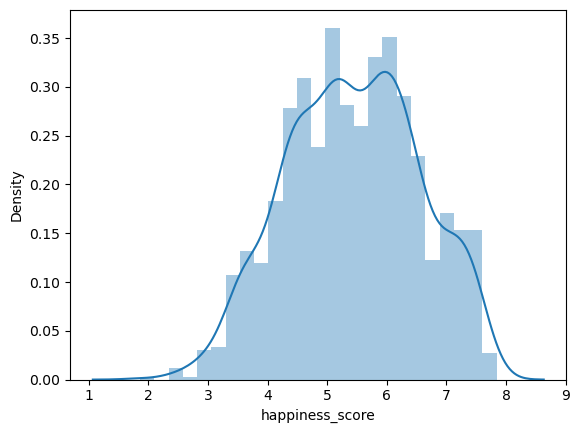

In [23]:
# check for extreme values
sns.distplot(df['happiness_score'], bins=25)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_10038/3717646817.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gdp_per_capita'], bins=25)


<Axes: xlabel='gdp_per_capita', ylabel='Density'>

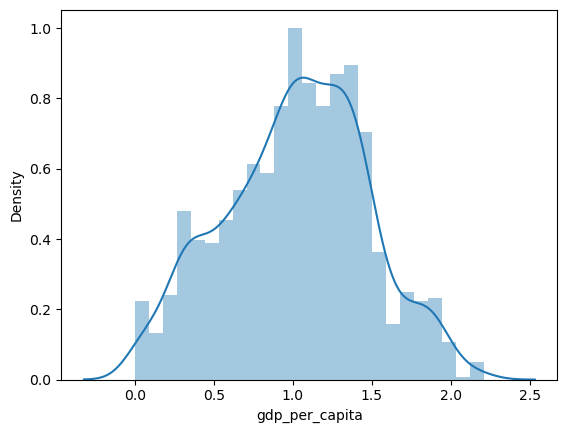

In [24]:
# check for extreme values
sns.distplot(df['gdp_per_capita'], bins=25)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_10038/1886290265.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['social_support'], bins=25)


<Axes: xlabel='social_support', ylabel='Density'>

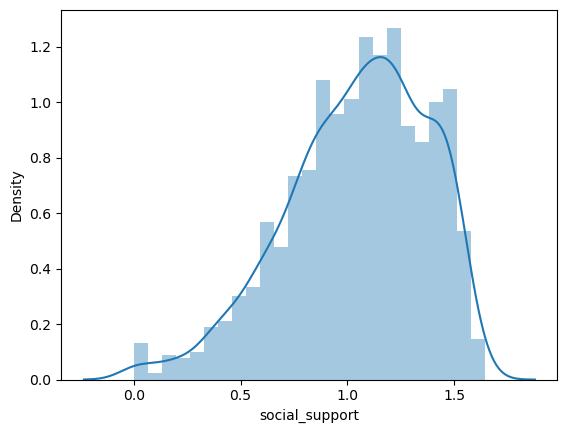

In [25]:
# check for extreme values
sns.distplot(df['social_support'], bins=25)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_10038/23742892.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['healthy_life_expectancy'], bins=25)


<Axes: xlabel='healthy_life_expectancy', ylabel='Density'>

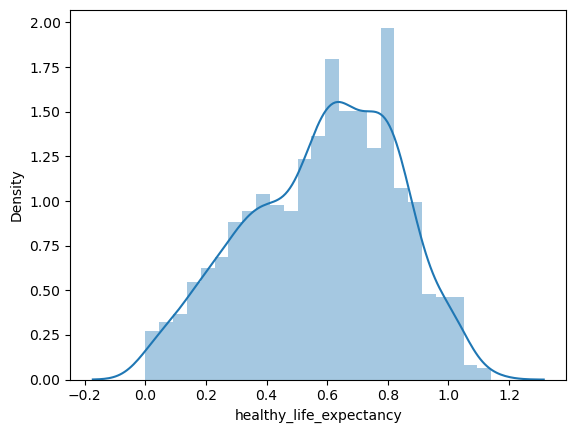

In [26]:
# check for extreme values
sns.distplot(df['healthy_life_expectancy'], bins=25)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_10038/1647791665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['freedom_to_make_life_choices'], bins=25)


<Axes: xlabel='freedom_to_make_life_choices', ylabel='Density'>

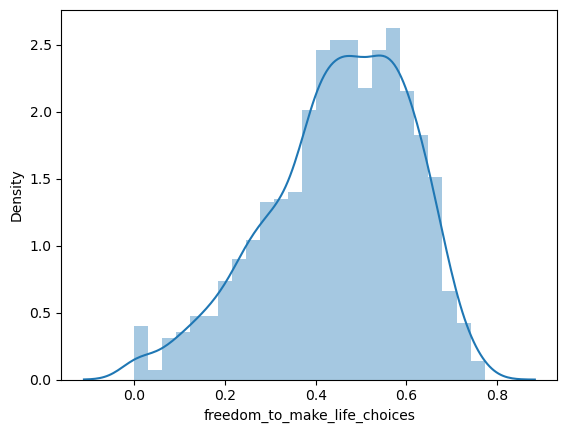

In [27]:
# check for extreme values
sns.distplot(df['freedom_to_make_life_choices'], bins=25)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_10038/1369664440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['generosity'], bins=25)


<Axes: xlabel='generosity', ylabel='Density'>

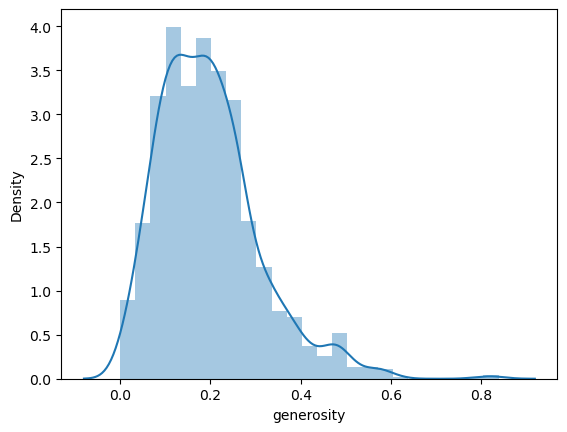

In [28]:
# check for extreme values
sns.distplot(df['generosity'], bins=25)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_10038/139314762.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['perceptions_of_corruption'], bins=25)


<Axes: xlabel='perceptions_of_corruption', ylabel='Density'>

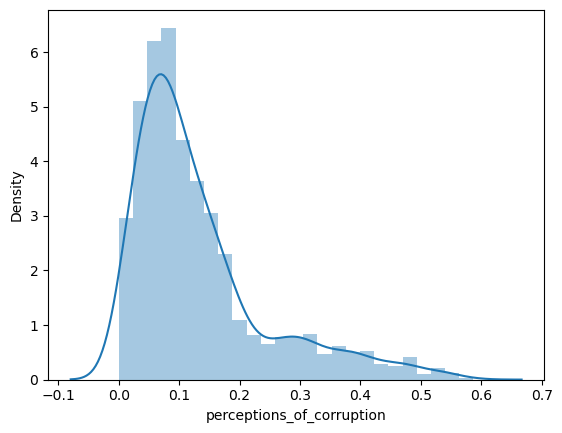

In [29]:
# check for extreme values
sns.distplot(df['perceptions_of_corruption'], bins=25)

/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_10038/1765646270.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'], bins=25)


<Axes: xlabel='year', ylabel='Density'>

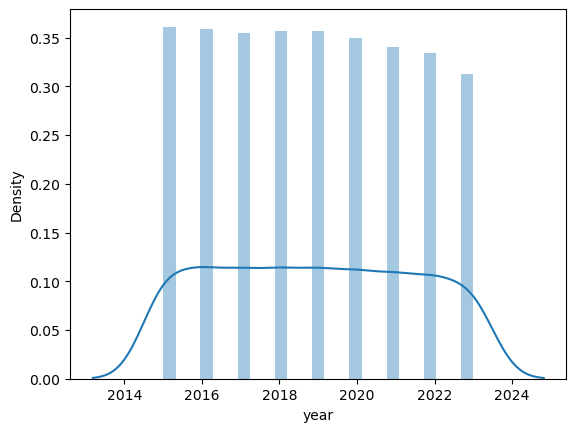

In [30]:
# check for extreme values
sns.distplot(df['year'], bins=25)

Comment: there don't appear to be any extreme values. Sometimes there is a little peak at "0", due to the binary nature of the data collected, maybe the "0" value is over-represented?

## Data Prep for Regression Analysis

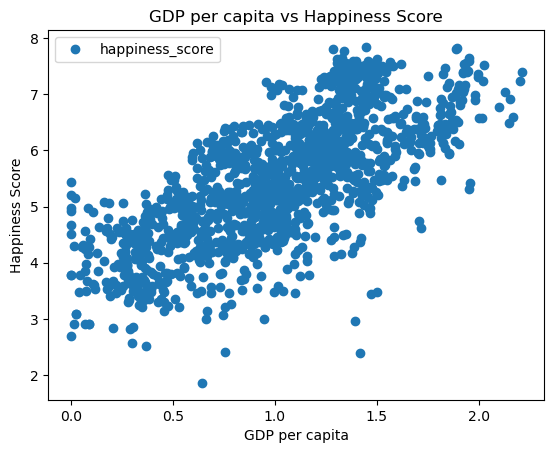

In [45]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'gdp_per_capita', y='happiness_score',style='o') 
plt.title('GDP per capita vs Happiness Score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness Score')  
plt.show()

### State your hypothesis for the relationship between the variables

There is a positive correlation between GDP per capita and happiness, such that if GDP per capita increases then the happiness score will increase too.

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

In [47]:
# look at X
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.67   ],
       [1.417  ],
       [0.645  ]])

In [48]:
# look at y
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [3.138],
       [2.392],
       [1.859]])

In [49]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [50]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [51]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

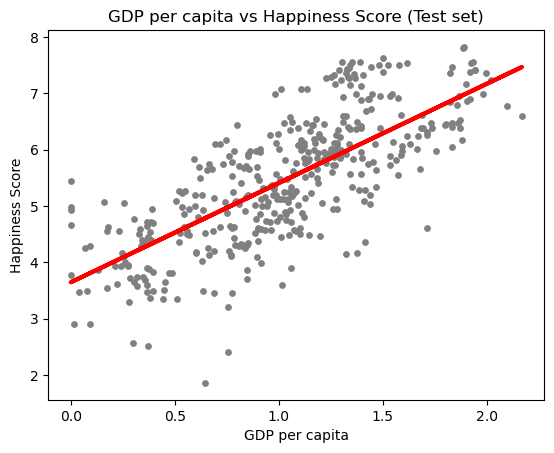

In [54]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

Comment: The line appears to fit the data well, although there are definitely outliers in the lower left area under the line; als9 in the left-most side above the line. But the general trend of the line fits the dots well.

In [55]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [56]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76086535]]
Mean squared error:  0.5794177985201602
R2 score:  0.5575536374315844


In [57]:
y_predicted

array([[5.86304424],
       [4.29587408],
       [5.14637204],
       [5.51379421],
       [5.51129378],
       [5.28701236],
       [6.25154928],
       [5.01254628],
       [3.87802073],
       [6.62902066],
       [3.77817967],
       [6.87378095],
       [6.08139154],
       [4.20751386],
       [4.12875035],
       [4.28703454],
       [4.3443507 ],
       [5.89778611],
       [4.94804578],
       [5.4228279 ],
       [5.21017262],
       [3.71667631],
       [6.85441143],
       [5.01606801],
       [5.49678425],
       [4.0916137 ],
       [5.22559482],
       [6.5814773 ],
       [5.52298592],
       [5.94959077],
       [5.84719645],
       [4.70398121],
       [7.069237  ],
       [5.66582732],
       [5.49502338],
       [6.00039174],
       [5.03288   ],
       [5.473893  ],
       [5.88769635],
       [4.56470539],
       [5.63073348],
       [4.29342694],
       [5.84793601],
       [6.03821512],
       [6.29259789],
       [4.98789416],
       [5.73094412],
       [6.104

In [60]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.9480,5.863044
1,2.5230,4.295874
2,4.3400,5.146372
3,6.4850,5.513794
4,3.8960,5.511294
5,4.5740,5.287012
6,7.5040,6.251549
7,4.6030,5.012546
8,3.8560,3.878021
9,6.3770,6.629021


## Compare how the regression fits the training set 

In [61]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [62]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [63]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76086535]]
Mean squared error:  0.6012168201588419
R2 score:  0.5081864239582867


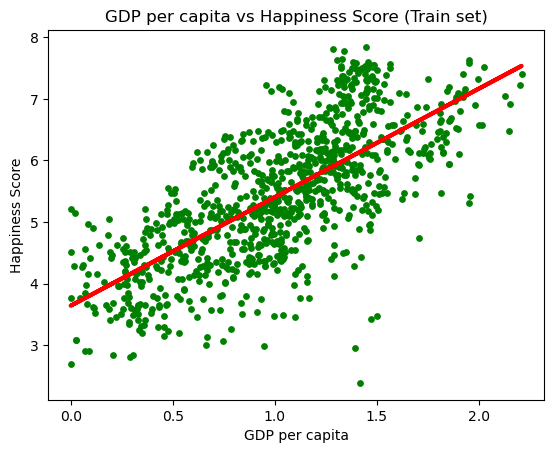

In [65]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness Score (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

### Discuss how well the model performed.

Comment: the R2 score for the training set (0.5082) was lower than the R2 score for the test set (0.5576), therefore the model was NOT overfitted.

The linear regression model shows a good ability to predict the test set. The mean squared errors are not overly high, at 0.58 and 0.60 for the test and train sets respectively. The R2 value is higher for the test set and it is 56%, meaning that there is a positive correlation between the two variables and that the "GDP per capita" explains over half of the variance in happiness scores. 

There are potential sources of bias in the data that are difficult to control. The "GDP per capita" may be too one-dimensional to capture all the economic aspects of a society, such as income distribution between wealthy and poor, social welfare programs, mobility in the labour market, etc.. and these are all also important for happiness. The "happiness score" might not accurately represent how happy someone is as it is difficult to compress everything in a life down to a score of 1 to 10. There may also be cultural bias in how someone answers this question, as different cultures may have different definitions of what constitutes a good life. However, the collection methods (the Gallup World Poll) seems relatively free from bias.